In [1]:
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url='https://raw.githubusercontent.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')
FILE_NAME = 'x08.csv'

In [26]:
# functions operating on 'normal' lists
# without using any additional functions.

class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]

    def fit(self, X, Y):
        meanX = 0
        meanY = 0
        #WE ASSUME X and Y have same lenght
        for ic in range(0, len(X)):
            meanX = meanX + X[ic]
            meanY = meanY + Y[ic]
        meanX = meanX/len(X)
        meanY = meanY/len(Y)
        #We look for such form Y= B*X + A
        A = 0 
        B = 0
        B_nominator = 0
        B_denomiantor = 0
        for ic in range(0, len(X)):
            B_denomiantor = B_denomiantor + math.pow(X[ic] - meanX, 2)
            B_nominator = B_nominator + (X[ic] - meanX)*(Y[ic] - meanY)
        B = B_nominator/B_denomiantor
        A = meanY - B*meanX
        self._theta = [A, B]
        return [A, B]

    def getParams(self):
        return self._theta

    def predict(self, x):
        PARAMS = self._theta 
        Y = PARAMS[1]*x + PARAMS[0]   
        return Y

In [4]:
def runTests_MySimpleLinearRegression():
    """
    Some examples how one can test your functions.
    """
    model = MySimpleLinearRegression()
    # y= 2 *x -4 no noise
    x = [0, 1, 2, 3]
    y = [-4., -2, 0, 2]
    model.fit(x, y)
    params = model.getParams()
    np.testing.assert_almost_equal(params[0], -4.)
    np.testing.assert_almost_equal(params[1], 2.)
    np.testing.assert_almost_equal(model.predict(7), 10.)

In [5]:
runTests_MySimpleLinearRegression()

In [6]:
#run test is working properly so we should be fine moving on :)

In [75]:
def loadData(filename):
    #we have 4 colums of interest, we create dataset from combination of those colums
    data = np.loadtxt(filename, delimiter=',')
    
    dataset1 = [ data[:, 1].tolist() , data[:, 2].tolist() ]
    dataset2 = [ data[:, 1].tolist() , data[:, 3].tolist() ]
    dataset3 = [ data[:, 1].tolist() , data[:, 4].tolist() ]
    dataset4 = [ data[:, 2].tolist() , data[:, 3].tolist() ]
    dataset5 = [ data[:, 2].tolist() , data[:, 4].tolist() ]
    dataset6 = [ data[:, 3].tolist() , data[:, 4].tolist() ]
    return (dataset1, dataset2, dataset3, dataset4, dataset5, dataset6)

In [73]:
def plotData(data):
    model = MySimpleLinearRegression()
    model.fit(data[0], data[1])
    yPredicted = [model.predict(x) for x in data[0]]
    plt.scatter(data[0], data[1])
    plt.plot(data[0], yPredicted)
    #plt.xlim(2, 20)  # set axis X range
    #plt.ylim(2, 14)  # set axis Y range
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

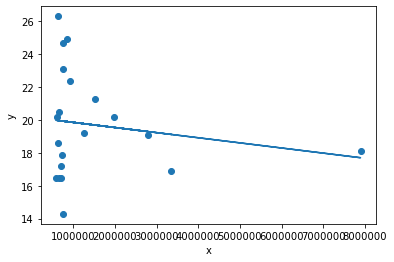

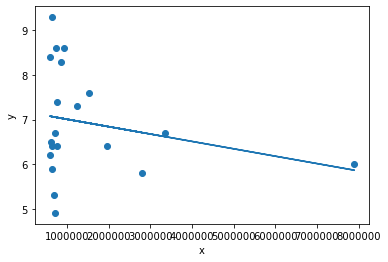

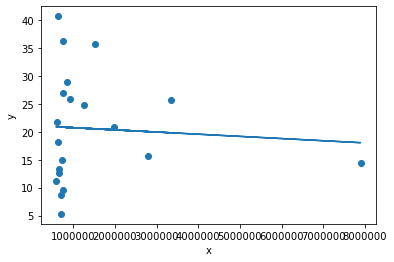

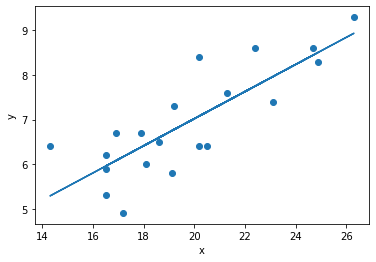

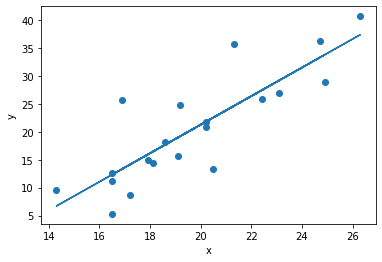

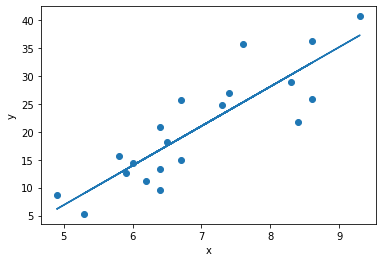

In [81]:
datas = loadData(FILE_NAME)
#terrible way of doing this but suggested method in template didn't work
plotData(datas[0])
plotData(datas[1])
plotData(datas[2])
plotData(datas[3])
plotData(datas[4])
plotData(datas[5])

In [ ]:
#It works for some combinations quite nicely